# Project 3 - Clustering
## Hotel customer segmentation
### This notebook uses the dateset *HotelCustomersDataset.tsv*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

Please check the following URL for information about the dataset structure and content: https://www.sciencedirect.com/science/article/pii/S2352340920314645

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant.</p>

#### Introduction
<p>Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing. Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.</p>

#### Customer segmentation in hotel H
<p>Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one only customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.</p>
<p>Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers.</p>

#### The challenge
<p>Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database.</p>


### Questions or additional informations
For any additional questions, don't hesitate to get in touch with one of the instructors. The instructors will also act as the hotel company/project stakeholder.

## Initializations and data loading

In [52]:
# Loading packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [53]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv('HotelCustomersDataset.tsv', sep="\t")
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,83590.0,NaN,NaN,NaN,41795.5,24130.498838,1.0,20898.25,41795.5,62692.75,83590.0
Nationality,83590,188,FRA,12422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,79811.0,NaN,NaN,NaN,45.398028,16.572368,-11.0,34.0,46.0,57.0,122.0
DaysSinceCreation,83590.0,NaN,NaN,NaN,453.640902,313.390291,0.0,177.0,397.0,723.0,1095.0
NameHash,83590,80642,0xD1490806AB49549565586CE26419163D5EFDD3C607B9...,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,83590,76993,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,83590.0,NaN,NaN,NaN,66.196028,87.75899,-1.0,0.0,29.0,103.0,588.0
LodgingRevenue,83590.0,NaN,NaN,NaN,298.802087,372.851892,0.0,59.0,234.0,402.0,21781.0
OtherRevenue,83590.0,NaN,NaN,NaN,67.589132,114.327776,0.0,2.0,38.5,87.675,7730.25
BookingsCanceled,83590.0,NaN,NaN,NaN,0.002022,0.06677,0.0,0.0,0.0,0.0,9.0


In [54]:
# Show top rows
ds.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

Check for duplicates:

In [56]:
ds.DocIDHash.describe()

count                                                 83590
unique                                                76993
top       0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...
freq                                                   3657
Name: DocIDHash, dtype: object

In [57]:
binary_cols = [col for col in ds.columns if col.startswith("SR")]
numeric_cols = ds.select_dtypes(include='number').columns.difference(set(binary_cols + ['ID']))
categorical_cols = ds.select_dtypes(include='object').columns.difference(['DocIDHash'])

agg_funcs = {
    'ID': 'first',
    'Nationality': lambda x: x.mode(dropna=False).iloc[0] if not x.mode(dropna=False).empty else None,
    'Age': lambda x: x.mean() if not x.isnull().all() else None,
    'LodgingRevenue': lambda x: x.sum(min_count=1),  
    'OtherRevenue': lambda x: x.sum(min_count=1),
    'MarketSegment': lambda x: ','.join(x.dropna().unique()) if x.notna().any() else None,
    'DistributionChannel': lambda x: ','.join(x.dropna().unique()) if x.notna().any() else None,
}

agg_funcs.update({col: 'max' for col in binary_cols})

agg_funcs.update({col: lambda x: x.mean() if not x.isnull().all() else None for col in numeric_cols})

agg_funcs.update({
    col: lambda x: x.mode(dropna=False).iloc[0] if not x.mode(dropna=False).empty else None
    for col in categorical_cols
})

ds_grouped = ds.groupby("DocIDHash").agg(agg_funcs).reset_index()

In [58]:
ds_grouped.DocIDHash.describe()

count                                                 76993
unique                                                76993
top       0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...
freq                                                      1
Name: DocIDHash, dtype: object

Missing values:

In [59]:
print(ds_grouped.isnull().sum())

DocIDHash                 0
ID                        0
Nationality               0
Age                     233
LodgingRevenue            0
OtherRevenue              0
MarketSegment             0
DistributionChannel       0
SRHighFloor               0
SRLowFloor                0
SRAccessibleRoom          0
SRMediumFloor             0
SRBathtub                 0
SRShower                  0
SRCrib                    0
SRKingSizeBed             0
SRTwinBed                 0
SRNearElevator            0
SRAwayFromElevator        0
SRNoAlcoholInMiniBar      0
SRQuietRoom               0
AverageLeadTime           0
BookingsCanceled          0
BookingsCheckedIn         0
BookingsNoShowed          0
DaysSinceCreation         0
DaysSinceFirstStay        0
DaysSinceLastStay         0
PersonsNights             0
RoomNights                0
NameHash                  0
dtype: int64


In [60]:
ds_grouped['Age'].fillna(ds_grouped['Age'].median(), inplace=True)

C:\Users\laura\AppData\Local\Temp\ipykernel_5624\802997779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_grouped['Age'].fillna(ds_grouped['Age'].median(), inplace=True)


In [61]:
print(ds_grouped.isnull().sum())

DocIDHash               0
ID                      0
Nationality             0
Age                     0
LodgingRevenue          0
OtherRevenue            0
MarketSegment           0
DistributionChannel     0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
AverageLeadTime         0
BookingsCanceled        0
BookingsCheckedIn       0
BookingsNoShowed        0
DaysSinceCreation       0
DaysSinceFirstStay      0
DaysSinceLastStay       0
PersonsNights           0
RoomNights              0
NameHash                0
dtype: int64


Categorical variables:

In [62]:
ds_grouped['Nationality'].value_counts()

Nationality
FRA    12176
DEU    10038
GBR     8420
PRT     7072
ESP     4682
       ...  
WSM        1
DMA        1
SWZ        1
PCN        1
MMR        1
Name: count, Length: 188, dtype: int64

In [63]:
ds_grouped['Nationality'].unique()

array(['CAN', 'ESP', 'USA', 'GBR', 'IND', 'FRA', 'CHE', 'BRA', 'ITA',
       'DEU', 'SWE', 'JPN', 'PRT', 'BEL', 'ISR', 'NLD', 'GRC', 'POL',
       'AUT', 'ARG', 'SRB', 'HUN', 'CUB', 'AUS', 'RUS', 'KOR', 'ROU',
       'IRL', 'DNK', 'FIN', 'AZE', 'VNM', 'MEX', 'CHN', 'CZE', 'LBY',
       'SVK', 'AGO', 'LUX', 'NOR', 'LTU', 'MOZ', 'CYP', 'IRQ', 'UKR',
       'LVA', 'URY', 'SVN', 'CMR', 'CHL', 'ISL', 'TUR', 'PHL', 'EGY',
       'LBN', 'TWN', 'KGZ', 'MAR', 'DZA', 'CRI', 'BGR', 'NAM', 'PCN',
       'NZL', 'HRV', 'COD', 'GTM', 'MDG', 'IRN', 'THA', 'EST', 'MKD',
       'MLT', 'BLR', 'ARE', 'LKA', 'COL', 'SYR', 'RWA', 'MYS', 'IDN',
       'MLI', 'BIH', 'VEN', 'PER', 'SGP', 'HKG', 'TCD', 'ZAF', 'KWT',
       'WSM', 'UGA', 'BHR', 'PAK', 'AIA', 'SAU', 'PRY', 'PAN', 'VCT',
       'KAZ', 'ATF', 'CAF', 'TUN', 'ATA', 'OMN', 'BGD', 'BEN', 'MCO',
       'ALB', 'ECU', 'CIV', 'UMI', 'MDV', 'GHA', 'SMR', 'AND', 'NGA',
       'KEN', 'SLV', 'GNB', 'ARM', 'BOL', 'BRB', 'VIR', 'TGO', 'SEN',
       'GUY', 'COM',

In [64]:
ds_grouped['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator      63872
Direct                     10768
Corporate                   1922
Electronic Distribution      431
Name: count, dtype: int64

In [65]:
ds_grouped['MarketSegment'].value_counts()

MarketSegment
Other                    44737
Travel Agent/Operator    10998
Direct                   10447
Groups                    8705
Corporate                 1561
Complementary              374
Aviation                   171
Name: count, dtype: int64

Como analisamos que nas variáveis 'DaysSinceFirstStay' e 'DaysSinceLastStay' temos valores nagativos vamos eliminar estes clientes porque são valores impossiveis 

In [66]:
ds_grouped = ds_grouped[
    ~((ds_grouped["DaysSinceLastStay"] == -1) & (ds_grouped["DaysSinceFirstStay"] == -1))
]

In [67]:
ds_grouped =  ds_grouped[(ds_grouped["Age"] >= 0)]

In [68]:
ds_grouped =  ds_grouped[(ds_grouped["AverageLeadTime"] >= 0)]

In [69]:
ds_grouped.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DocIDHash,58555,58555,0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,58555.0,NaN,NaN,NaN,36278.43846,22788.560947,1.0,17474.5,33144.0,53448.0,83589.0
Nationality,58555,176,FRA,9197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,58555.0,NaN,NaN,NaN,47.253791,15.005586,0.0,36.0,47.0,58.0,114.0
LodgingRevenue,58555.0,NaN,NaN,NaN,397.782912,367.235409,0.0,194.0,311.7,475.0,10990.5
OtherRevenue,58555.0,NaN,NaN,NaN,89.576127,119.446652,0.0,28.0,56.7,110.5,7730.25
MarketSegment,58555,7,Other,33515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistributionChannel,58555,4,Travel Agent/Operator,48820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRHighFloor,58555.0,NaN,NaN,NaN,0.046725,0.211052,0.0,0.0,0.0,0.0,1.0
SRLowFloor,58555.0,NaN,NaN,NaN,0.001349,0.036706,0.0,0.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'LodgingRevenue'}>,
        <Axes: title={'center': 'OtherRevenue'}>,
        <Axes: title={'center': 'SRHighFloor'}>,
        <Axes: title={'center': 'SRLowFloor'}>],
       [<Axes: title={'center': 'SRAccessibleRoom'}>,
        <Axes: title={'center': 'SRMediumFloor'}>,
        <Axes: title={'center': 'SRBathtub'}>,
        <Axes: title={'center': 'SRShower'}>,
        <Axes: title={'center': 'SRCrib'}>],
       [<Axes: title={'center': 'SRKingSizeBed'}>,
        <Axes: title={'center': 'SRTwinBed'}>,
        <Axes: title={'center': 'SRNearElevator'}>,
        <Axes: title={'center': 'SRAwayFromElevator'}>,
        <Axes: title={'center': 'SRNoAlcoholInMiniBar'}>],
       [<Axes: title={'center': 'SRQuietRoom'}>,
        <Axes: title={'center': 'AverageLeadTime'}>,
        <Axes: title={'center': 'BookingsCanceled'}>,
        <Axes: title={'center': 'BookingsCheckedIn'}>,
        <Axes: title={'center': 'Booking

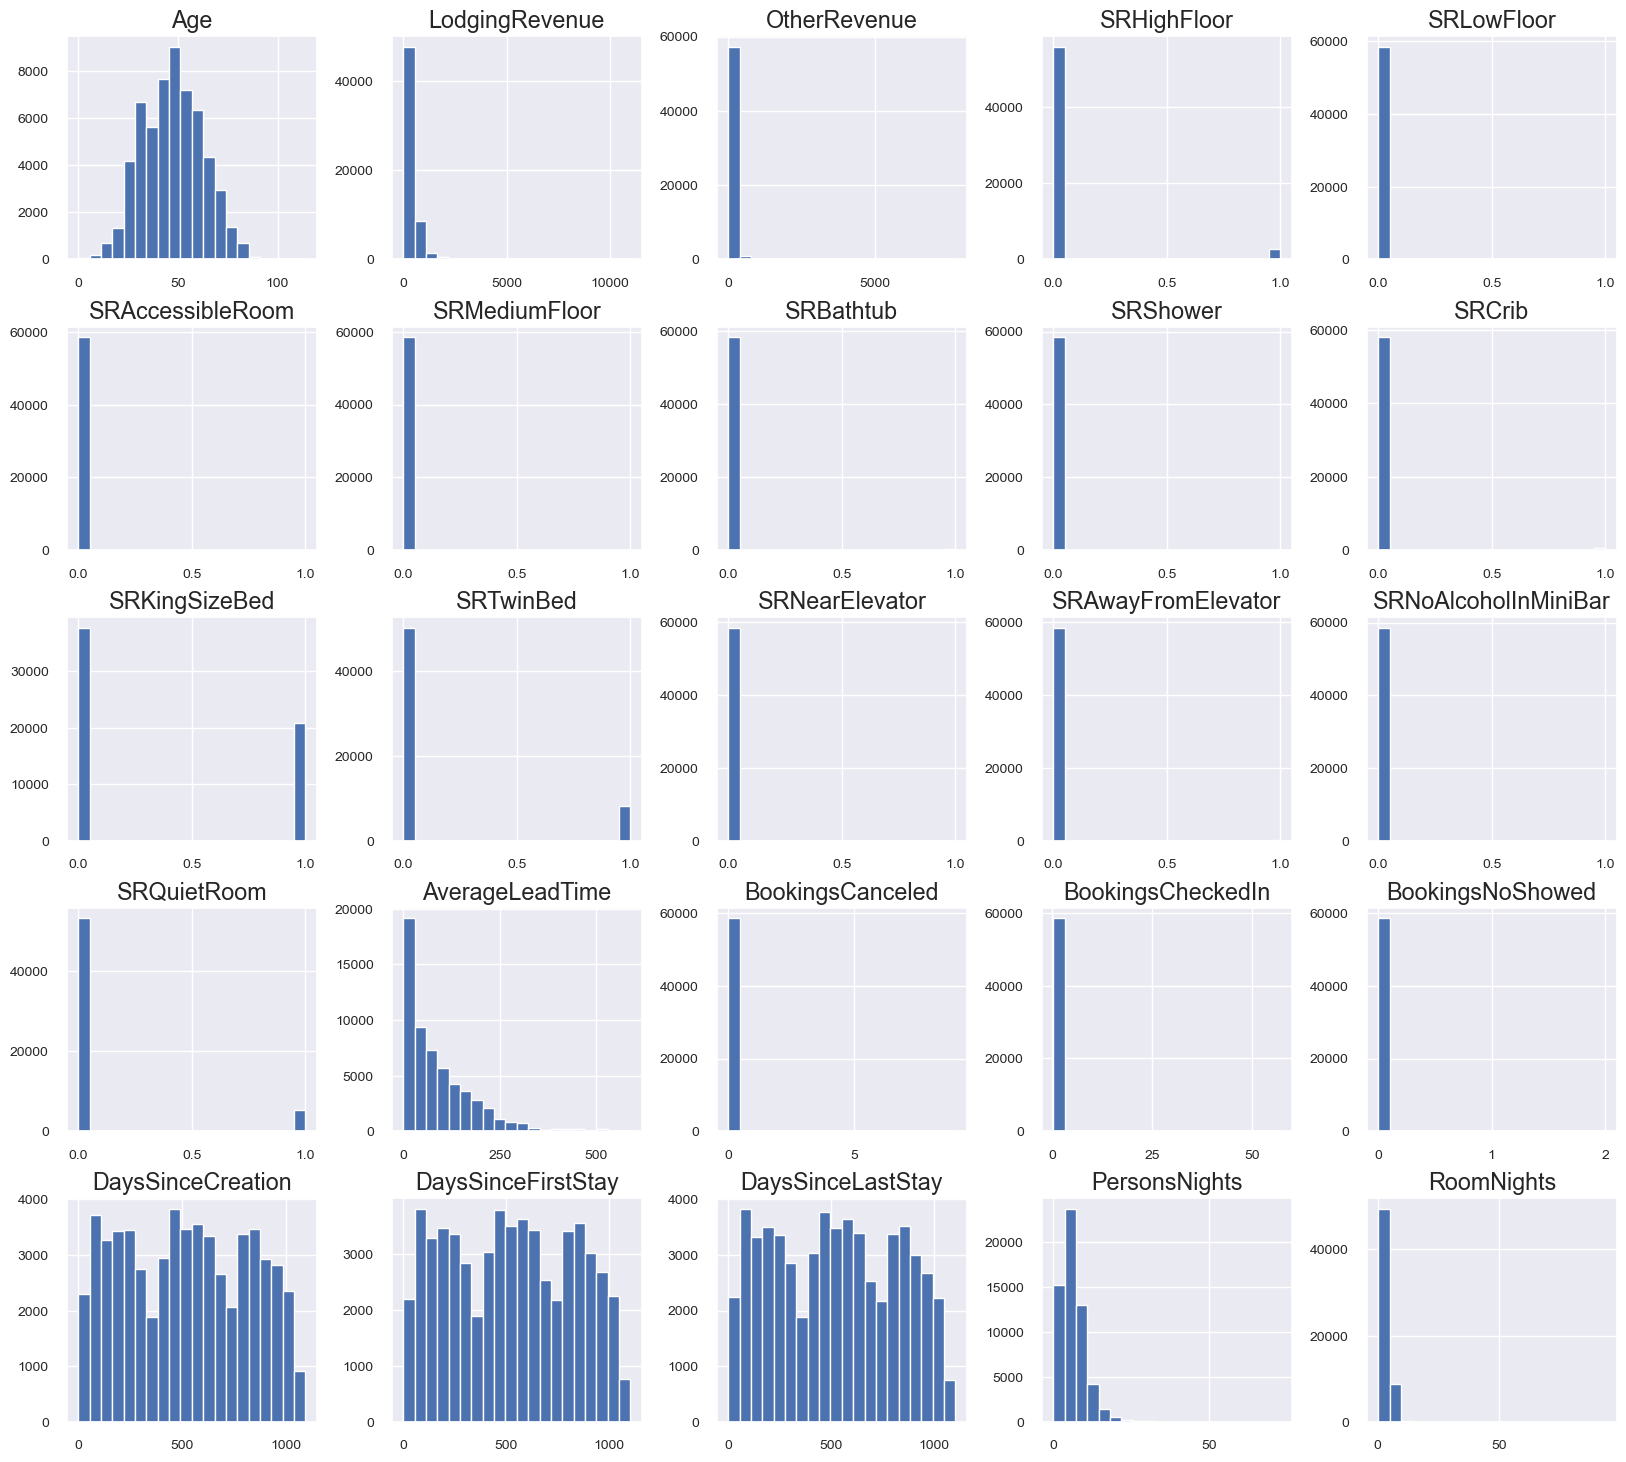

In [70]:
numerical=ds_grouped .select_dtypes(include=[np.number]).columns.tolist()
numerical = [col for col in numerical if col.lower() != 'id']
ds_grouped[numerical].hist(bins=20, figsize=(20, 18), xlabelsize=10, ylabelsize=10)

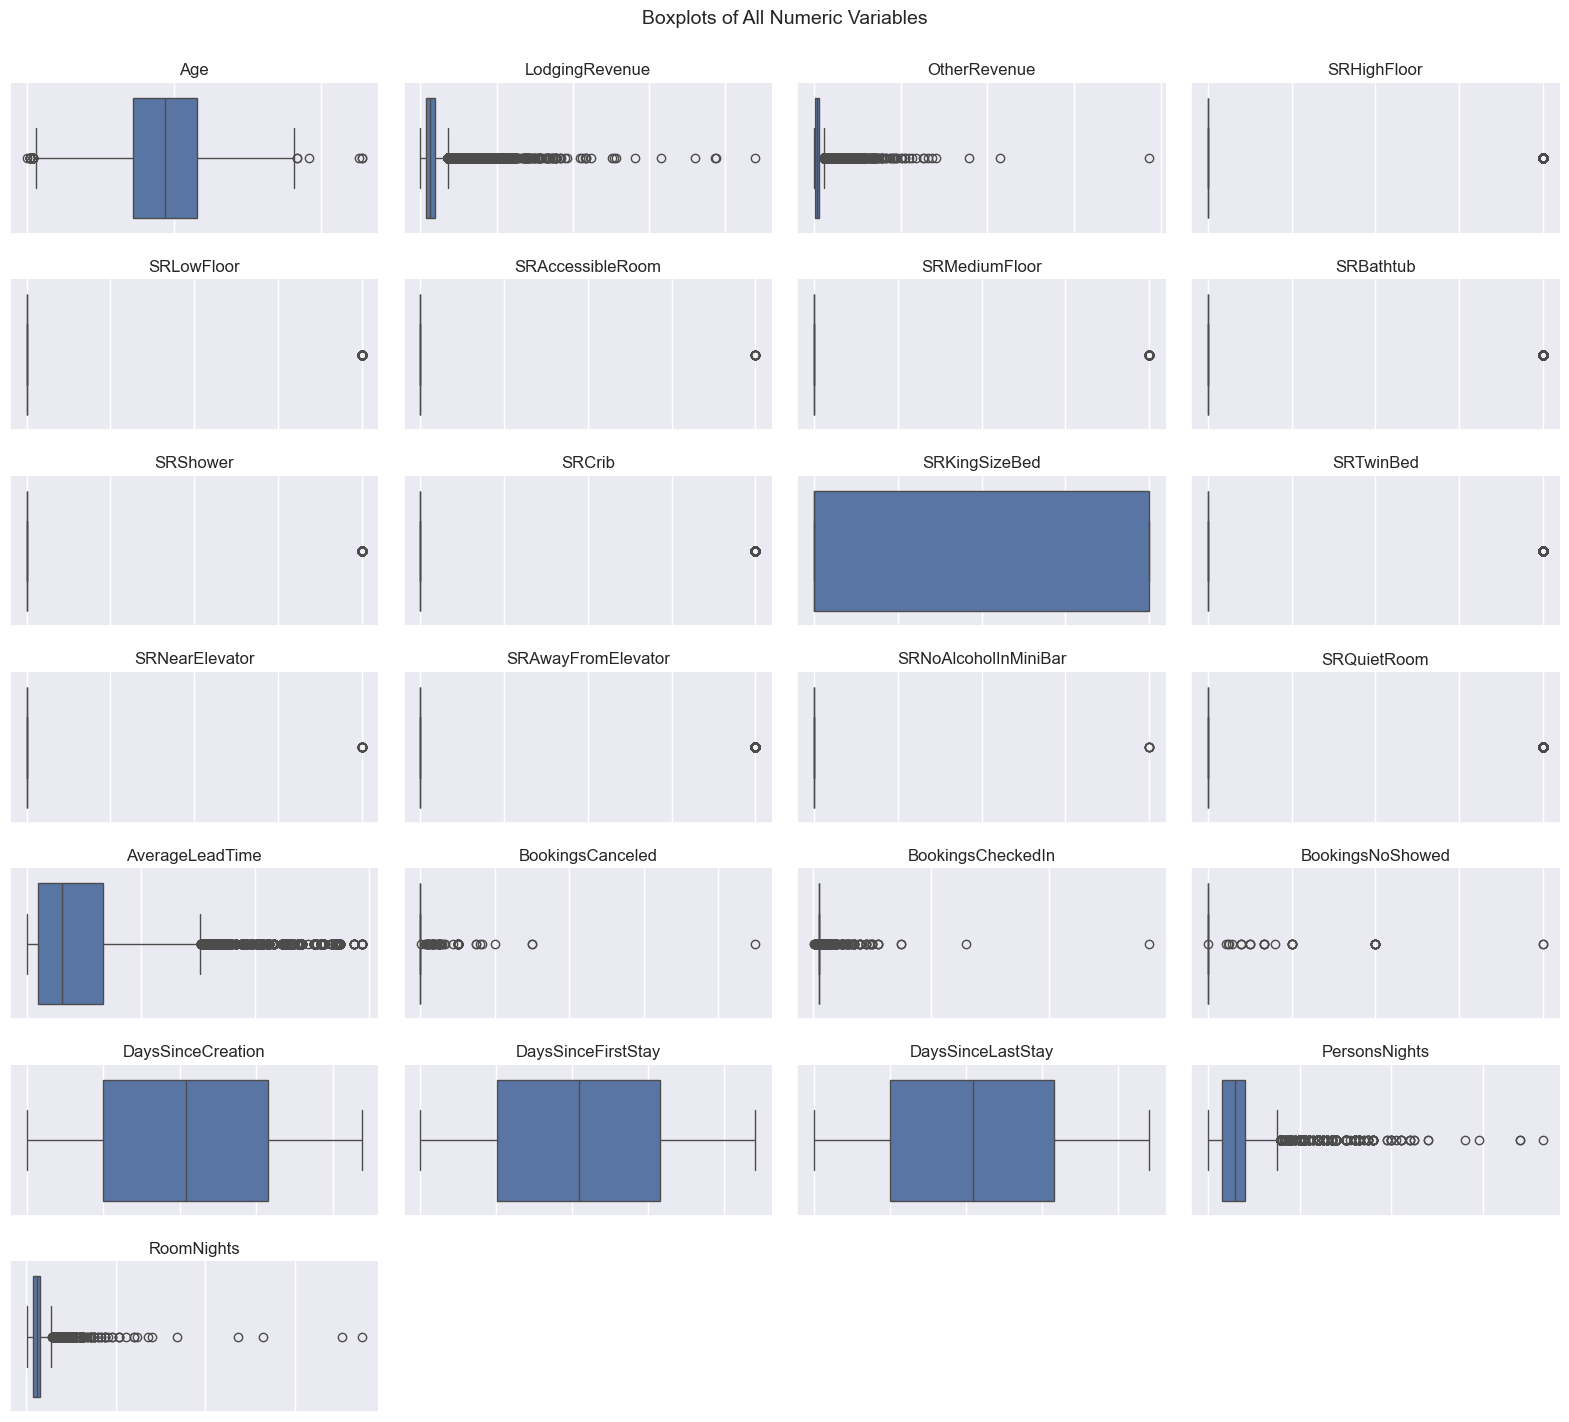

In [71]:
num_cols = 4  
num_rows = int(np.ceil(len(numerical) / num_cols))  
  
fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 2))  
ax = ax.flatten()  
  
for i, var in enumerate(numerical):  
    sns.boxplot(data=ds_grouped, x=var, ax=ax[i])  
    ax[i].set_title(var, fontsize=12)  
    ax[i].set_xlabel("") 
    ax[i].tick_params(axis='x', labelbottom=False) 
   
for j in range(i + 1, len(ax)):  
    ax[j].set_visible(False)  
  
plt.tight_layout()  
plt.suptitle("Boxplots of All Numeric Variables", fontsize=14, y=1.02)  
sns.despine()  
plt.show()

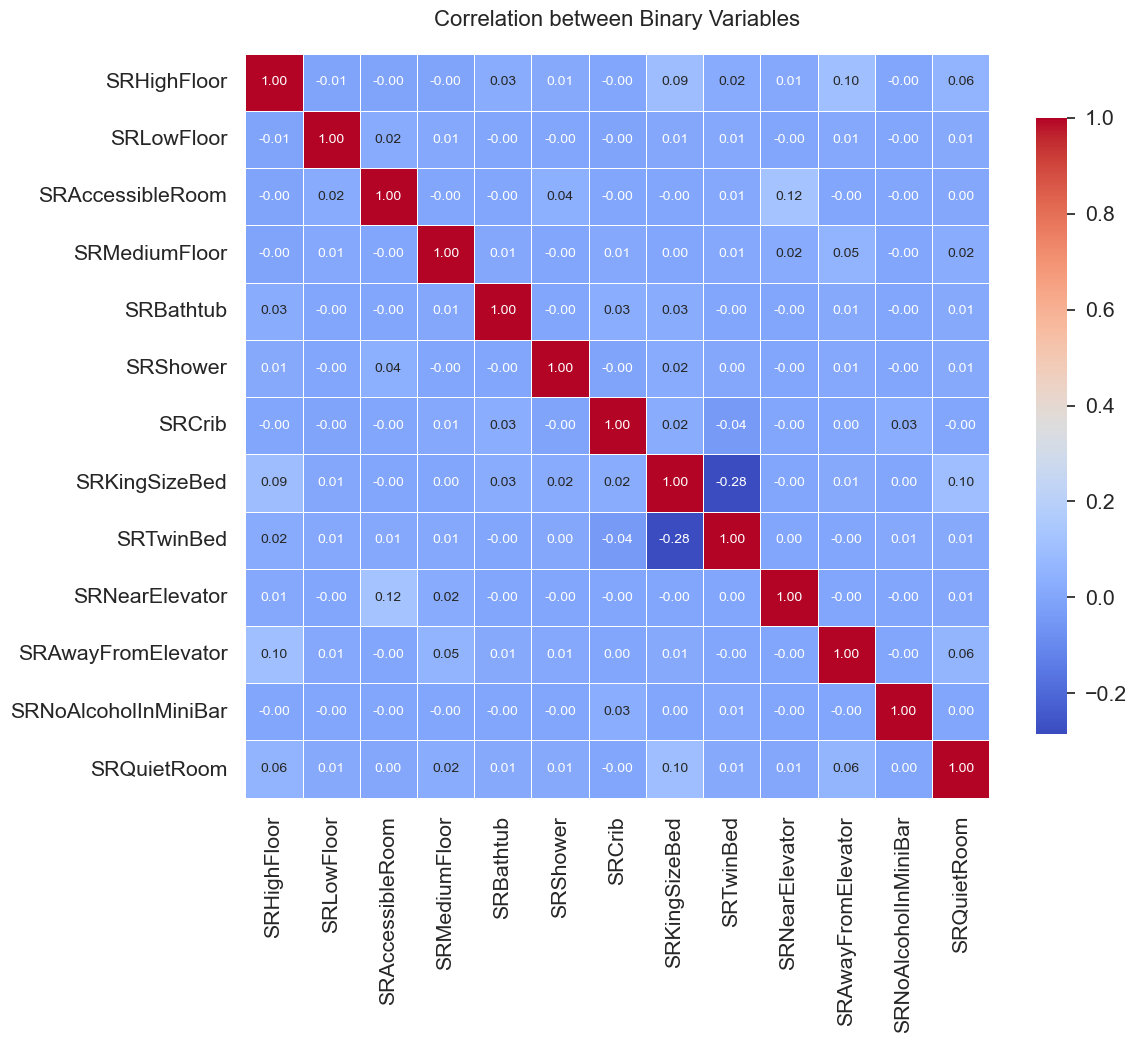

In [72]:
binary_cols = [col for col in ds.columns if ds_grouped[col].dropna().isin([0, 1]).all()]  
df_bin = ds[binary_cols]  
  
correlation_matrix = df_bin.corr()  
  

plt.figure(figsize=(12, 10))  
  
sns.heatmap(correlation_matrix,   
            annot=True,     
            cmap="coolwarm",   
            fmt=".2f",   
            square=True,   
            linewidths=.5,   
            cbar_kws={"shrink": .8},   
            annot_kws={"size": 10}, 
            xticklabels=correlation_matrix.columns,   
            yticklabels=correlation_matrix.columns)  
   
plt.title("Correlation between Binary Variables", fontsize=16, pad=20)  
    
plt.show()  

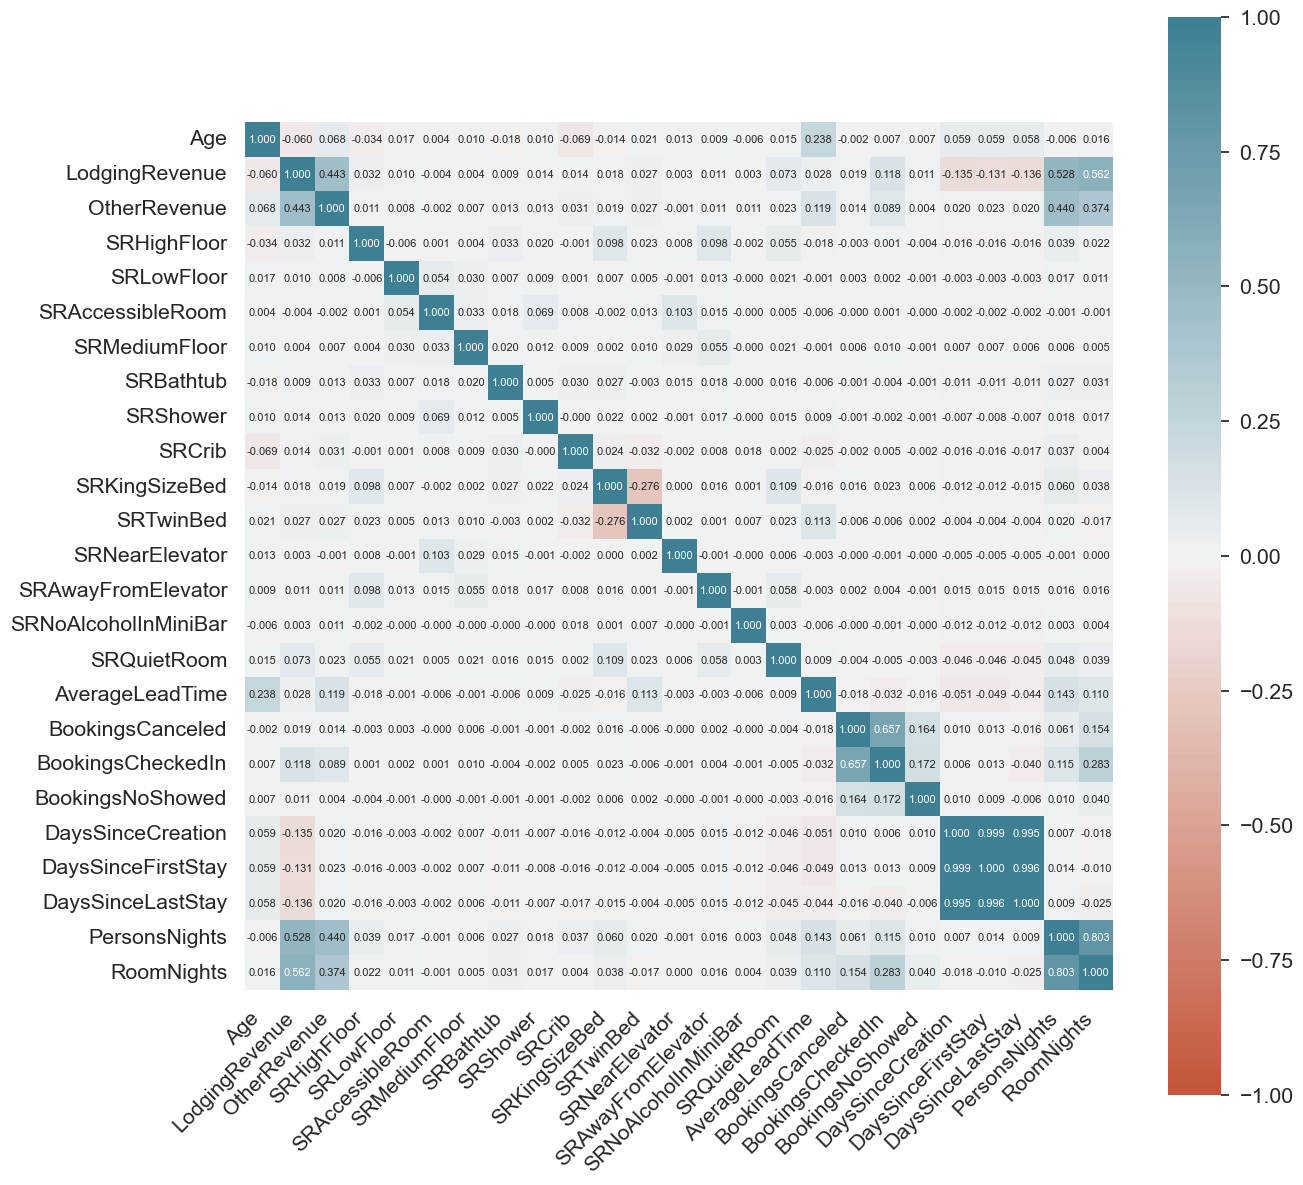

In [73]:
corr = ds_grouped[numerical].corr()
plt.figure(figsize=(14, 14))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 8},
    fmt='.3f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Data Preparation

### Outliers
After analysing the boxplots from numerical features, we decided to only treat outliers from below to prevent our model to be negatively impacted. The other ones, we consider that are possible values and we do not intend to lose very valuable (purchasing power) customer information.

In [135]:
X = ds_grouped.copy(deep=True)

In [136]:
X.drop(X[X.Age > 100].index, inplace=True)

In [137]:
X.drop(X[X.LodgingRevenue > 6500].index, inplace=True)

In [138]:
X.drop(X[X.OtherRevenue > 2500].index, inplace=True)

In [139]:
X.drop(X[X.AverageLeadTime > 550].index, inplace=True)

In [140]:
X.drop(X[X.BookingsCanceled > 2].index, inplace=True)

In [141]:
X.drop(X[X.BookingsCheckedIn > 12].index, inplace=True)

In [142]:
X.drop(X[X.BookingsNoShowed > 1].index, inplace=True)

In [143]:
X.drop(X[X.PersonsNights > 50].index, inplace=True)

In [144]:
X.drop(X[X.RoomNights > 50].index, inplace=True)

Convertion into dummy variables:

In [145]:
def one_hot(s, prefix):
    d = pd.get_dummies(s, prefix=prefix, drop_first=True)  
    return d.astype(int)

cols = ['DistributionChannel', 'MarketSegment']
for col in cols:
    colToProcess = X[col].astype(str)
    procDF = one_hot(colToProcess, col)
    X = pd.concat([X, procDF], axis=1)

In [146]:
cols = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

X = pd.get_dummies(data=X,columns=cols,drop_first=True)

In [147]:
def one_hot_with_other_abs(s, prefix, min_count=500):
    counts = s.value_counts()
    categories = counts[counts >= min_count].index.tolist()
    s_mod = s.apply(lambda x: x if x in categories else 'Other')
    dummies = pd.get_dummies(s_mod, prefix=prefix, drop_first=False)  # <-- drop_first=False
    return dummies.astype(int)
procDF = one_hot_with_other_abs(X['Nationality'].astype(str), 'Nationality', min_count=500)
X.drop(columns=['Nationality'], inplace=True)
X = pd.concat([X, procDF], axis=1)



In [148]:
cols = ['ID', 'NameHash', 'DocIDHash','DistributionChannel', 'MarketSegment']
X.drop(columns=cols, inplace=True)

In [150]:
# Get a copy of the dataframe before normalization for results' analysis
X_beforeNorm = X.copy(deep=True)

In [151]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.values), columns=X.columns,index=X.index)

In [152]:
print(X.shape)
X.describe(include='all').T

(58499, 55)


,count,mean,std,min,25%,50%,75%,max
Age,58499.0,0.492075,0.156174,0.0,0.375000,0.489583,0.593750,1.0
LodgingRevenue,58499.0,0.062315,0.055757,0.0,0.030484,0.049010,0.074639,1.0
OtherRevenue,58499.0,0.037817,0.046547,0.0,0.011912,0.024063,0.047011,1.0
AverageLeadTime,58499.0,0.161912,0.165213,0.0,0.034608,0.111111,0.242259,1.0
BookingsCanceled,58499.0,0.000458,0.014668,0.0,0.000000,0.000000,0.000000,1.0
BookingsCheckedIn,58499.0,0.071904,0.022497,0.0,0.069767,0.069767,0.069767,1.0
BookingsNoShowed,58499.0,0.000266,0.014003,0.0,0.000000,0.000000,0.000000,1.0
DaysSinceCreation,58499.0,0.474732,0.274129,0.0,0.228311,0.475799,0.719635,1.0
DaysSinceFirstStay,58499.0,0.473059,0.272174,0.0,0.228261,0.474638,0.716486,1.0
DaysSinceLastStay,58499.0,0.471439,0.272246,0.0,0.226449,0.472826,0.714674,1.0


## Modeling - K-Means
For information about K-Means and other clustering algoritms available in Scikit-learn check https://scikit-learn.org/stable/modules/clustering.html

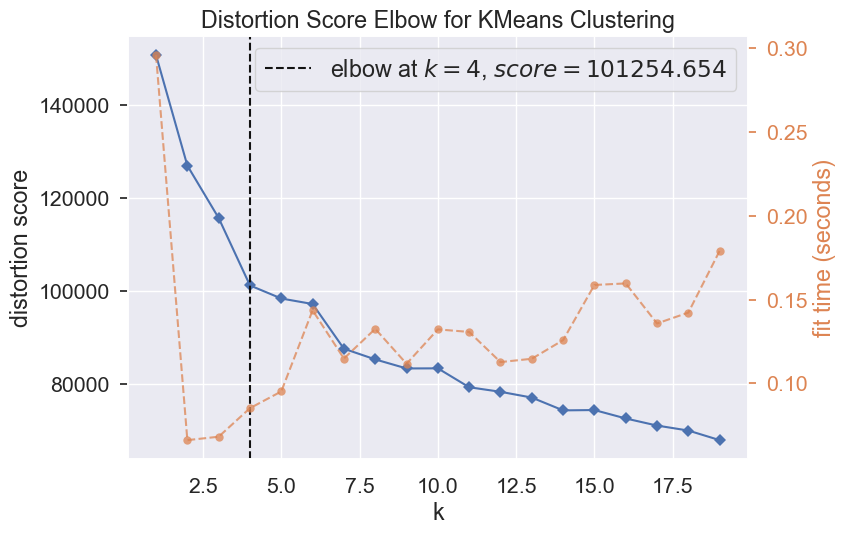

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(X)
visualizer.show() 

In [160]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

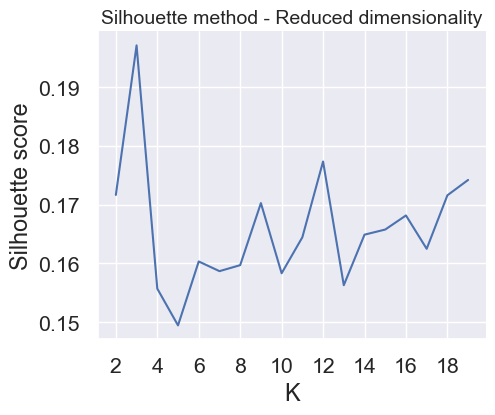

In [156]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state=123).fit(X)
  labels = km.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 20), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize);

In [157]:
# Apply the K-Means for K=6
K=4
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X)
y_kmeans = kmeans.predict(X)

C:\Users\laura\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


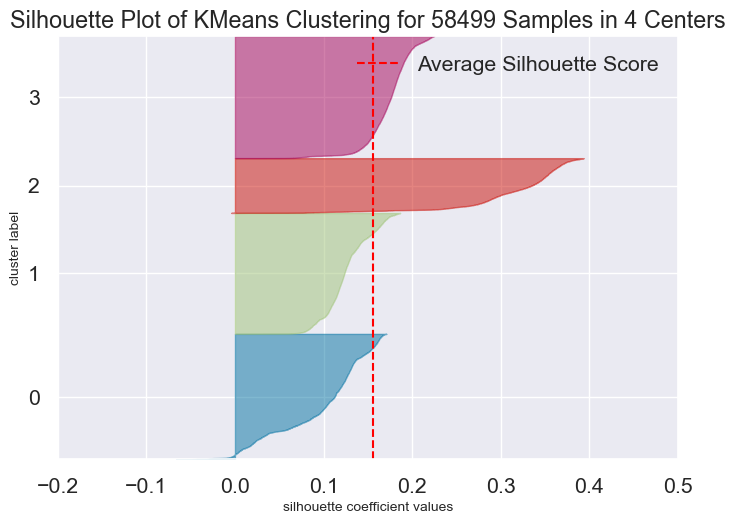

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58499 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [158]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

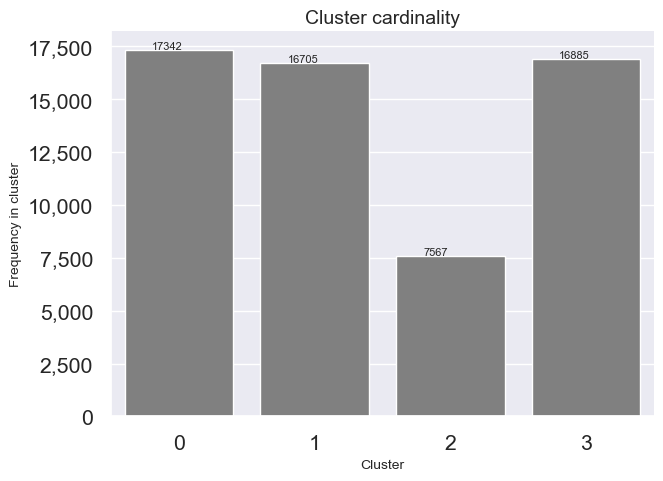

In [161]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = X_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

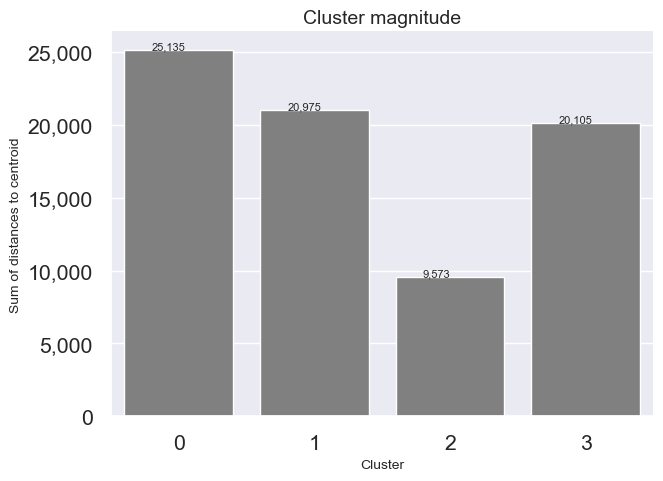

In [162]:
# Plot clusters magnitude

# Compute Magnitude
X['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = X['distanceToCentroid'].groupby(y_kmeans).sum()
X = X.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

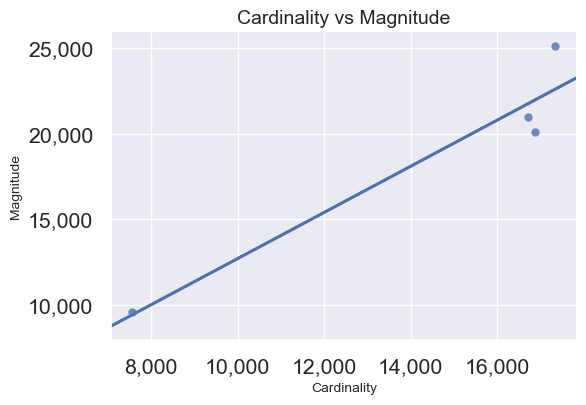

In [163]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

C:\Users\laura\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


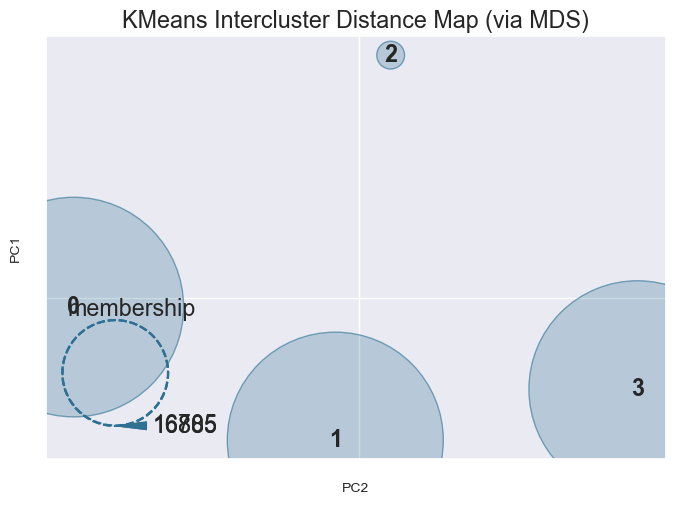

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [164]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X)
visualizer.show()

### Interpret clusters results


In [165]:
# Check the mean values of each cluster for top relevant features
clustersMeanDF = pd.DataFrame(X_beforeNorm.groupby(y_kmeans).mean(),columns=X_beforeNorm.columns)
clustersMeanDF = clustersMeanDF.reindex(sorted(clustersMeanDF.columns), axis=1)
clustersMeanDF.transpose()

,0,1,2,3
Age,51.290634,45.568692,45.396143,45.556941
AverageLeadTime,114.744752,83.746364,63.439159,78.829504
BookingsCanceled,0.002173,0.000012,0.001745,0.000148
BookingsCheckedIn,1.037637,1.008587,1.037000,1.015827
BookingsNoShowed,0.000801,0.000000,0.000198,0.000012
DaysSinceCreation,533.416716,520.310398,474.992258,525.500951
DaysSinceFirstStay,535.954912,522.891453,476.520114,528.058616
DaysSinceLastStay,532.715212,522.669364,472.511603,527.203886
DistributionChannel_Direct,0.000000,0.000838,0.997886,0.001658
DistributionChannel_Electronic Distribution,0.000404,0.020413,0.000661,0.003435


# chat gpt para k=4
Sure! Here's the interpretation of the clusters in English:

---

### **Cluster 0**

* **Profile**: Older clients with the highest lead time and a strong preference for travel agent/operator channels.
* **Revenue**: Moderate lodging and ancillary revenue.
* **Requests**: Very few special room requests.
* **Nationality**: A diverse group with a strong presence from Germany, France, and Portugal.
* **Behavior**: Moderate number of room and person nights. They show a mix of group and agent bookings, very few cancellations.

**Insight**: Traditional clients, perhaps older tourists who book well in advance through agencies, not very demanding in terms of room customization.

---

### **Cluster 1**

* **Profile**: Slightly younger clients, with a lower lead time than cluster 0, and a *very* strong preference for travel agents/operators.
* **Revenue**: Highest lodging revenue among all clusters.
* **Requests**: Many requests for quiet rooms and higher floors, which might indicate preference for comfort or business travel.
* **Nationality**: Diverse, with notable presence from France, UK, Germany, Belgium, and "Other" nationalities.
* **Behavior**: Highest number of person nights. Bookings are mostly through agents, almost no direct or digital bookings.

**Insight**: Possibly business travelers or higher-end tourists using travel agents who stay longer and seek comfort.

---

### **Cluster 2**

* **Profile**: Similar in age to cluster 1, but with the lowest lead time (i.e., book closer to stay date).
* **Revenue**: High lodging and ancillary revenue.
* **Requests**: Significant room preferences — notably high for cribs, king-size beds, and quiet rooms.
* **Nationality**: Strong presence of Portuguese guests.
* **Booking Channel**: Overwhelming preference for **direct bookings**, indicating a digitally active or brand-loyal group.
* **Behavior**: High number of stays checked-in, lowest no-show rate.

**Insight**: Local or loyal clients, likely families or individuals familiar with the brand, who book directly and make detailed requests.

---

### **Cluster 3**

* **Profile**: Matches cluster 2 in age and stay behavior.
* **Revenue**: Similar to cluster 2 — good overall revenue.
* **Requests**: Highest percentage requesting king-size beds and quiet rooms.
* **Nationality**: Strong representation from “Other” nationalities and USA.
* **Booking Channel**: Very high reliance on travel agents/operators.
* **Behavior**: High person and room nights.

**Insight**: Likely a luxury- or comfort-seeking group of international travelers, heavily reliant on agents but highly specific in preferences.

---

### **Summary Comparison Table**

| Feature                    | Cluster 0     | Cluster 1            | Cluster 2             | Cluster 3       |
| -------------------------- | ------------- | -------------------- | --------------------- | --------------- |
| **Age**                    | Oldest        | Younger than 0       | Similar to 1          | Similar to 2    |
| **Lead Time**              | Highest       | Moderate             | Lowest                | Low-Moderate    |
| **Lodging Revenue**        | Moderate      | Highest              | High                  | High            |
| **Booking Channel**        | Agent         | Agent (almost only)  | Mostly **Direct**     | Agent           |
| **Room Preferences**       | Low           | Quiet, High Floor    | Crib, Quiet, King Bed | Quiet, King Bed |
| **Nationality Highlights** | DEU, FRA, PRT | GBR, BEL, FRA, Other | PRT                   | USA, Other      |

---


